# Mask R-CNN - Train on Coco Dataset


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install imgaug
!pip install Cython
!pip install pycocotools
!pip install tensorflow-gpu==1.13.1
!pip install keras==2.1.5
print("Installed packages")

     |████████████████████████████████| 345.2MB 42kB/s 
     |████████████████████████████████| 3.2MB 39.8MB/s 
     |████████████████████████████████| 368kB 35.2MB/s 
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
     |████████████████████████████████| 337kB 2.8MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
Installed packages


In [1]:
import keras
keras.__version__

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

'2.1.5'

In [2]:
# Import Python Packages
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import imgaug


os.chdir( "/content/drive/My Drive/Mobil_MRCNN")
# Root directory of the project
ROOT_DIR = os.getcwd()

# Import Mobilenet Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library

# print("Uploading config.py from google colab")
# from google.colab import files
# src = list(files.upload().values())[0]
# open('config.py','wb').write(src)
# import config

# print("Uploading utils.py from google colab")
# src = list(files.upload().values())[0]
# open('utils.py','wb').write(src)
# import utils

# print("Uploading the model.py from google colab")
# src = list(files.upload().values())[0]
# open('model.py','wb').write(src)
# import model

# print("Uploading visualize.py from google colab")
# src = list(files.upload().values())[0]
# open('visualize.py','wb').write(src)
# import visualize

# print("Uploading coco.py from google colab")
# src = list(files.upload().values())[0]
# open('coco.py','wb').write(src)
# import coco

# print("Uploading parallel_model.py from google colab")
# from google.colab import files
# src = list(files.upload().values())[0]
# open('parallel_model.py','wb').write(src)

# Import Mobile Mask R-CNN Packages
from config import Config
import utils
import model as modellib
import visualize
from model import log
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Coco Dataset directory
COCO_DIR = os.path.join(ROOT_DIR, 'data/coco')

# Local path to trained weights file
DEFAULT_WEIGHTS = os.path.join(ROOT_DIR, "mobile_mask_rcnn_coco.h5")

## Configurations

In [3]:
class CocoConfig(Config):
    """Configuration for training on MS COCO.
    Derives from the base Config class and overrides values specific
    to the COCO dataset.
    """
    ## Give the configuration a recognizable name
    NAME = "mmrcnn_cocoperson"

    ## GPU
    IMAGES_PER_GPU = 1
    GPU_COUNT = 2

    ## Number of classes (including background)
    NUM_CLASSES = 1 + 1  # COCO has 80 classes (1+80)

    ## Backbone Architecture
    BACKBONE = "mobilenet"

    ## Size Options
    # BACKBONE_STRIDES = [4, 8, 16, 32, 64] #ResNet
    BACKBONE_STRIDES = [2, 4, 8, 16, 32]

    #RPN_ANCHOR_SCALES = (16, 32, 64, 128, 256) #ResNet
    RPN_ANCHOR_SCALES = (8 , 16, 32, 64, 128)

    # MINI_MASK_SHAPE = (56, 56) #ResNet
    MINI_MASK_SHAPE = (28, 28)

    ## Input Resolution
    #IMAGE_MIN_DIM = 400
    IMAGE_MAX_DIM = 512

    #TRAIN_ROIS_PER_IMAGE = 200 #ResNet
    TRAIN_ROIS_PER_IMAGE = 128

    
config = CocoConfig()
config.display()


Configurations:
BACKBONE                       mobilenet
BACKBONE_STRIDES               [2, 4, 8, 16, 32]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      2
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

## Notebook Preferences

In [4]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Dataset

In [11]:
# Training Dataset
classes = ['car']
dataset_train = coco.CocoDataset()
dataset_train.load_coco(COCO_DIR, "train", year="2017", class_names=classes)
dataset_train.prepare()

# Validation Dataset
dataset_val = coco.CocoDataset()
dataset_val.load_coco(COCO_DIR, "val", class_names=classes)
dataset_val.prepare()

loading annotations into memory...
Done (t=23.76s)
creating index...
index created!
loading annotations into memory...
Done (t=0.93s)
creating index...
index created!


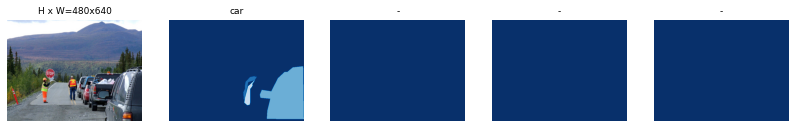

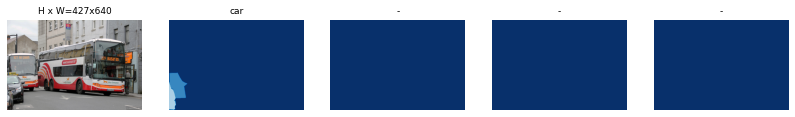

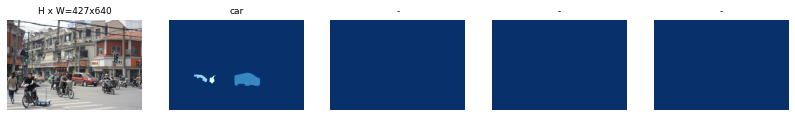

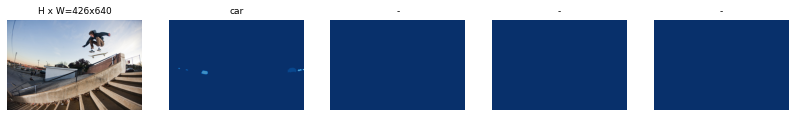

In [12]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

## Create Model

In [13]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", model_dir = MODEL_DIR, config=config)
model.keras_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
input_image_meta (InputLayer)   (None, 14)           0                                            
__________________________________________________________________________________________________
input_rpn_match (InputLayer)    (None, None, 1)      0                                            
__________________________________________________________________________________________________
input_rpn_bbox (InputLayer)     (None, None, 4)      0                                            
__________________________________________________________________________________________________
input_gt_c

In [14]:
# Which weights to start with?
init_weights = "coco"  # imagenet, coco, or last

if init_weights == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_weights == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(DEFAULT_WEIGHTS, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_weights == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last()[1], by_name=True)

## Training

In [71]:
# Augmentation
augmentation = imgaug.augmenters.Fliplr(0.5)

In [74]:
# Training - Stage 1
# Finetune network heads
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE,
            epochs=10,
            layers='heads',
            augmentation=augmentation)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/My Drive/Mobil_MRCNN/logs/mmrcnn_cocoperson20200628T0518/mask_rcnn_mmrcnn_cocoperson_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_deconv      (TimeDistributed)
mrcnn_class_logits     (TimeDistributed)
mrcnn_mask             (TimeDistributed)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2087: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/10
 999/1000 [============================>.] - ETA: 0s - loss: 1.6494 - rpn_class_loss: 0.5300 - rpn_bbox_loss: 0.9989 - mrcnn_class_loss: 0.0317 - mrcnn_bbox_loss: 0.0400 - mrcnn_mask_loss: 0.0487

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


1000/1000 [==============================] - 381s 381ms/step - loss: 1.6521 - rpn_class_loss: 0.5300 - rpn_bbox_loss: 1.0011 - mrcnn_class_loss: 0.0316 - mrcnn_bbox_loss: 0.0402 - mrcnn_mask_loss: 0.0490 - val_loss: 1.6444 - val_rpn_class_loss: 0.5289 - val_rpn_bbox_loss: 1.0238 - val_mrcnn_class_loss: 0.0026 - val_mrcnn_bbox_loss: 0.0401 - val_mrcnn_mask_loss: 0.0490
Epoch 2/10
1000/1000 [==============================] - 323s 323ms/step - loss: 1.5287 - rpn_class_loss: 0.5301 - rpn_bbox_loss: 0.9365 - mrcnn_class_loss: 0.0022 - mrcnn_bbox_loss: 0.0240 - mrcnn_mask_loss: 0.0358 - val_loss: 1.3986 - val_rpn_class_loss: 0.5286 - val_rpn_bbox_loss: 0.8493 - val_mrcnn_class_loss: 4.1741e-04 - val_mrcnn_bbox_loss: 0.0063 - val_mrcnn_mask_loss: 0.0140
Epoch 3/10
1000/1000 [==============================] - 337s 337ms/step - loss: 1.6444 - rpn_class_loss: 0.5302 - rpn_bbox_loss: 1.0146 - mrcnn_class_loss: 0.0044 - mrcnn_bbox_loss: 0.0403 - mrcnn_mask_loss: 0.0548 - val_loss: 1.6384 - val_rpn

In [76]:
# Save weights
# Typically not needed because callbacks save after every epoch
# Uncomment to save manually
model_path = os.path.join(MODEL_DIR, "mobile_mask_rcnn_coco_person.h5")
model.keras_model.save_weights(model_path)

In [29]:
model = modellib.MaskRCNN(mode="training", model_dir = MODEL_DIR, config=config)
model.load_weights(model_path, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

In [30]:
# Training - Stage 2
# Finetune layers  stage 4 and up
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE,
            epochs=20,
            layers="5+",
            augmentation=augmentation)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/My Drive/Mobil_MRCNN/logs/mmrcnn_cocoperson20200628T0143/mask_rcnn_mmrcnn_cocoperson_{epoch:04d}.h5
Selecting layers to train
conv_dw_13             (DepthwiseConv2D)
conv_dw_13_bn          (BatchNorm)
conv_pw_13             (Conv2D)
conv_pw_13_bn          (BatchNorm)
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_deconv      (TimeDistributed)
mrcnn_class_logits     (TimeDistribu

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2087: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/20
 999/1000 [============================>.] - ETA: 0s - loss: 1.7523 - rpn_class_loss: 0.5424 - rpn_bbox_loss: 1.1161 - mrcnn_class_loss: 0.0040 - mrcnn_bbox_loss: 0.0416 - mrcnn_mask_loss: 0.0482

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


1000/1000 [==============================] - 367s 367ms/step - loss: 1.7519 - rpn_class_loss: 0.5424 - rpn_bbox_loss: 1.1157 - mrcnn_class_loss: 0.0040 - mrcnn_bbox_loss: 0.0416 - mrcnn_mask_loss: 0.0481 - val_loss: 1.7217 - val_rpn_class_loss: 0.5492 - val_rpn_bbox_loss: 1.1548 - val_mrcnn_class_loss: 3.6306e-04 - val_mrcnn_bbox_loss: 0.0034 - val_mrcnn_mask_loss: 0.0139
Epoch 2/20
1000/1000 [==============================] - 319s 319ms/step - loss: 1.6877 - rpn_class_loss: 0.5373 - rpn_bbox_loss: 1.0982 - mrcnn_class_loss: 0.0016 - mrcnn_bbox_loss: 0.0200 - mrcnn_mask_loss: 0.0305 - val_loss: 1.6211 - val_rpn_class_loss: 0.5362 - val_rpn_bbox_loss: 1.0386 - val_mrcnn_class_loss: 0.0011 - val_mrcnn_bbox_loss: 0.0174 - val_mrcnn_mask_loss: 0.0277
Epoch 3/20
1000/1000 [==============================] - 340s 340ms/step - loss: 1.6642 - rpn_class_loss: 0.5352 - rpn_bbox_loss: 1.0378 - mrcnn_class_loss: 0.0031 - mrcnn_bbox_loss: 0.0387 - mrcnn_mask_loss: 0.0494 - val_loss: 2.1112 - val_rpn

In [31]:
model_path = os.path.join(MODEL_DIR, "mobile_mask_rcnn_coco_person1.h5")
model.keras_model.save_weights(model_path)

In [32]:
model = modellib.MaskRCNN(mode="training", model_dir = MODEL_DIR, config=config)
model.load_weights(model_path, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

In [33]:
# Training - Stage 3
# Finetune all layers
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE / 10,
            epochs=10,
            layers='all',
            augmentation=augmentation)


Starting at epoch 0. LR=0.0001

Checkpoint Path: /content/drive/My Drive/Mobil_MRCNN/logs/mmrcnn_cocoperson20200628T0343/mask_rcnn_mmrcnn_cocoperson_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
conv1_bn               (BatchNorm)
conv_dw_1              (DepthwiseConv2D)
conv_dw_1_bn           (BatchNorm)
conv_pw_1              (Conv2D)
conv_pw_1_bn           (BatchNorm)
conv_dw_2              (DepthwiseConv2D)
conv_dw_2_bn           (BatchNorm)
conv_pw_2              (Conv2D)
conv_pw_2_bn           (BatchNorm)
conv_dw_3              (DepthwiseConv2D)
conv_dw_3_bn           (BatchNorm)
conv_pw_3              (Conv2D)
conv_pw_3_bn           (BatchNorm)
conv_dw_4              (DepthwiseConv2D)
conv_dw_4_bn           (BatchNorm)
conv_pw_4              (Conv2D)
conv_pw_4_bn           (BatchNorm)
conv_dw_5              (DepthwiseConv2D)
conv_dw_5_bn           (BatchNorm)
conv_pw_5              (Conv2D)
conv_pw_5_bn           (BatchNorm)
conv_dw_6              (Dep

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2087: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/10
 999/1000 [============================>.] - ETA: 0s - loss: 1.5798 - rpn_class_loss: 0.5285 - rpn_bbox_loss: 0.8808 - mrcnn_class_loss: 0.0341 - mrcnn_bbox_loss: 0.0655 - mrcnn_mask_loss: 0.0666

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


1000/1000 [==============================] - 464s 464ms/step - loss: 1.5794 - rpn_class_loss: 0.5285 - rpn_bbox_loss: 0.8806 - mrcnn_class_loss: 0.0341 - mrcnn_bbox_loss: 0.0655 - mrcnn_mask_loss: 0.0665 - val_loss: 1.4320 - val_rpn_class_loss: 0.5271 - val_rpn_bbox_loss: 0.8243 - val_mrcnn_class_loss: 0.0036 - val_mrcnn_bbox_loss: 0.0382 - val_mrcnn_mask_loss: 0.0347
Epoch 2/10
1000/1000 [==============================] - 420s 420ms/step - loss: 1.6268 - rpn_class_loss: 0.5300 - rpn_bbox_loss: 0.9743 - mrcnn_class_loss: 0.0045 - mrcnn_bbox_loss: 0.0543 - mrcnn_mask_loss: 0.0596 - val_loss: 1.4815 - val_rpn_class_loss: 0.5269 - val_rpn_bbox_loss: 0.8951 - val_mrcnn_class_loss: 0.0010 - val_mrcnn_bbox_loss: 0.0265 - val_mrcnn_mask_loss: 0.0277
Epoch 3/10
1000/1000 [==============================] - 428s 428ms/step - loss: 1.6799 - rpn_class_loss: 0.5324 - rpn_bbox_loss: 1.0262 - mrcnn_class_loss: 0.0053 - mrcnn_bbox_loss: 0.0513 - mrcnn_mask_loss: 0.0606 - val_loss: 1.5554 - val_rpn_cla

In [37]:
# Save weights
# Typically not needed because callbacks save after every epoch
# Uncomment to save manually
model_path = os.path.join(MODEL_DIR, "mobile_mask_rcnn_coco_person2.h5")
model.keras_model.save_weights(model_path)

## Detection

In [77]:
class InferenceConfig(CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
# model_path = model.find_last()[1]

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /content/drive/My Drive/Mobil_MRCNN/logs/mobile_mask_rcnn_coco_person.h5


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max:  640.00000  float64
gt_class_id              shape: (2,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (2, 4)                min:   48.00000  max:  259.00000  int32
gt_mask                  shape: (512, 512, 2)         min:    0.00000  max:    1.00000  bool


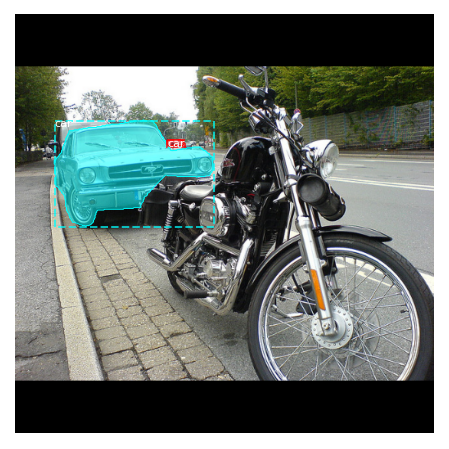

In [92]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))

Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17712  max:    1.11450  float32


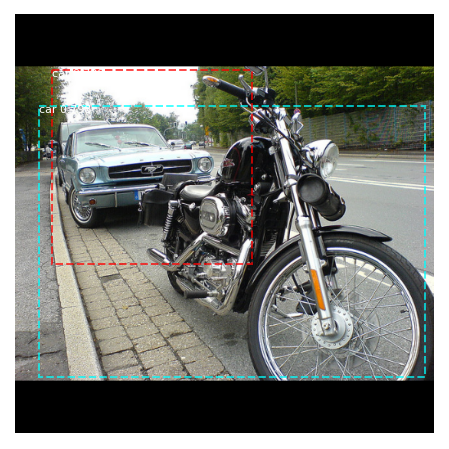

In [93]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())

## Evaluation

In [80]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
image_ids = np.random.choice(dataset_val.image_ids, 10)
APs = []

for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

mAP:  0.0


In [81]:
image_ids = np.random.choice(dataset_val.image_ids, 10)

In [82]:
image_ids

array([194, 495,  45,  40, 505, 487, 484, 528,  12, 147])

In [83]:
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_ids[0], use_mini_mask=False)

In [84]:
r['masks']

array([[[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       ...,

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]]])